<a href="https://colab.research.google.com/github/jeetpatel31/cs370-assignments/blob/main/index2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

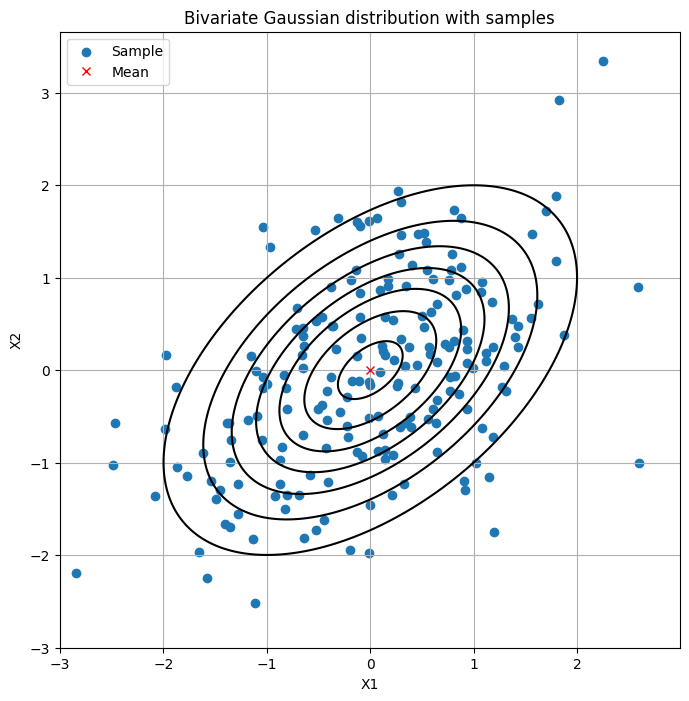

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Number of samples
m = 200

# Assuming mean and covariance for demonstration (replace with actual values)
mean = [0, 0]  # Placeholder mean
cov = [[1, 0.5], [0.5, 1]]  # Placeholder covariance matrix

# Generate m samples from the bivariate normal distribution
samples = np.random.multivariate_normal(mean, cov, m)

# Create a grid of points for plotting the contours
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Calculate the probability density function over the grid
rv = multivariate_normal(mean, cov)
pdf = rv.pdf(pos)

# Plot the samples and the contours
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], label='Sample')
plt.contour(x, y, pdf, colors='black')

# Mark the mean
plt.plot(mean[0], mean[1], 'rx', label='Mean')

# Final plot decorations
plt.title('Bivariate Gaussian distribution with samples')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vectors onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ?

### Problem 2B (5 points)

What determines the positive or negative correlations between the components ?

### Problem 2C (10 points)

Plot the projected vectors and show whether or not the projection agrees with the positive or negative correlations of the original matrix.



In [ ]:
# Insert your answer here and fee free to add markdown cells as needed

### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed